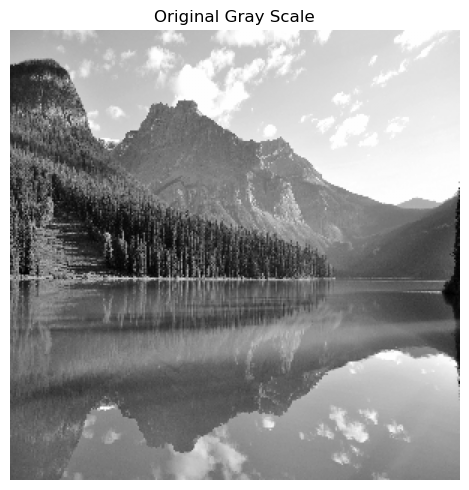

(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

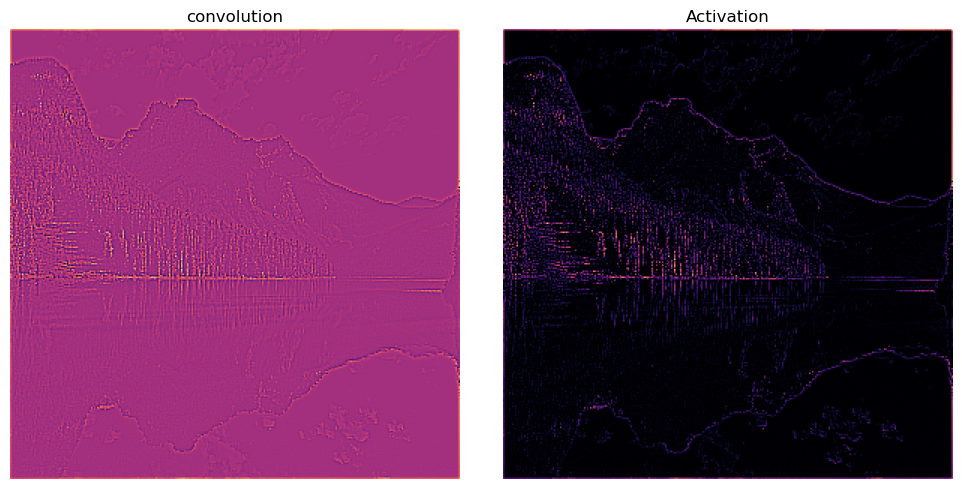

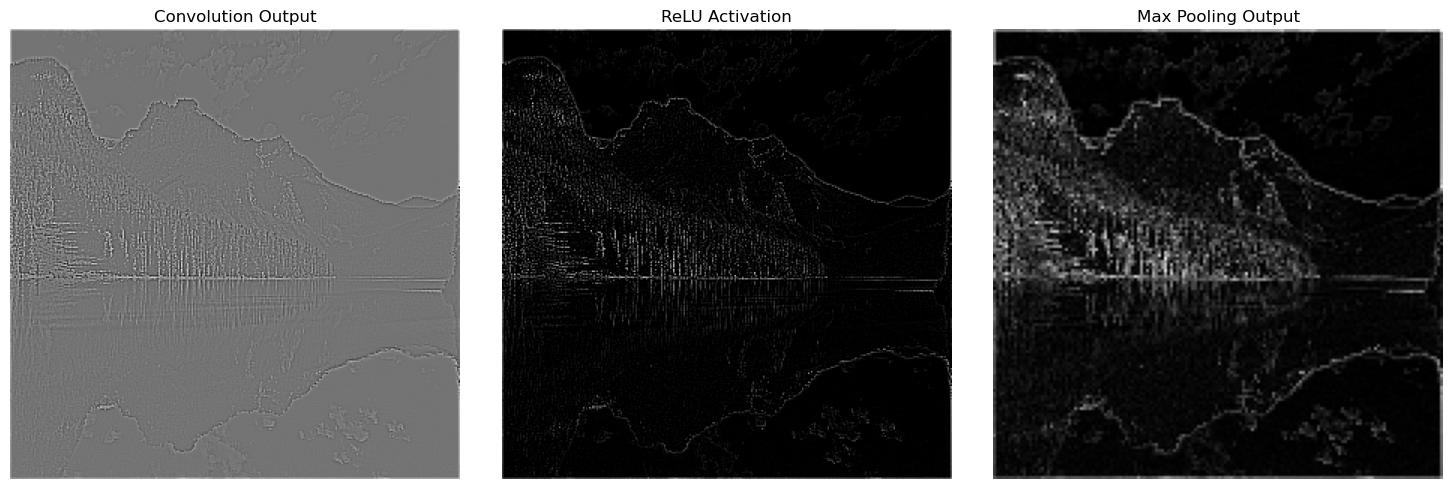

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1,-1,-1],
                      [-1, 8,-1],
                      [-1,-1,-1]])
#Load the Image
image = tf.io.read_file('paju.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

#plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title('Original Gray Scale')
plt.axis('off')
plt.show()

#Reformat
image=tf.image.convert_image_dtype(image,dtype=tf.float32)
image=tf.expand_dims(image,axis=0)
kernel=tf.reshape(kernel,[*kernel.shape,1,1])
kernel=tf.cast(kernel,dtype=tf.float32)

conv_fn=tf.nn.conv2d
image_filter=conv_fn(input=image ,filters=kernel,
strides=1,padding='SAME',)
plt.figure(figsize=(15,5))
#plot the convolution
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('convolution')

#activation layer
relu_fn=tf.nn.relu

#Image Detection
image_detect=relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

#pooling Layer (FIXED)
image_condense=tf.nn.pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME'
)
#Dislaying figure
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter),cmap='gray')
plt.title('Convolution Output')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect),cmap='gray')
plt.title('ReLU Activation')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect),cmap='gray')
plt.title('ReLU Activation')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense),cmap='gray')
plt.title('Max Pooling Output')
plt.axis('off')

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

C:\Users\feedb\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
